<a href="https://colab.research.google.com/github/RonitShetty/NLP-Labs/blob/main/C070_RonitShetty_NLPLab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Lab 5
****
**Aim:** Exploratory data analysis of textual data

**Roll No.:** C070  
**Name:** Ronit Shetty  
**SAP ID:** 70322000128  
**Division:** C  
**Batch:** C1  

Downloads complete.

--- Starting Part A: Novel Analysis ---
Loaded 'Pride and Prejudice' with 127377 words.
Loaded 'Frankenstein' with 75060 words.

Task A.i: Generating most frequent word distributions...


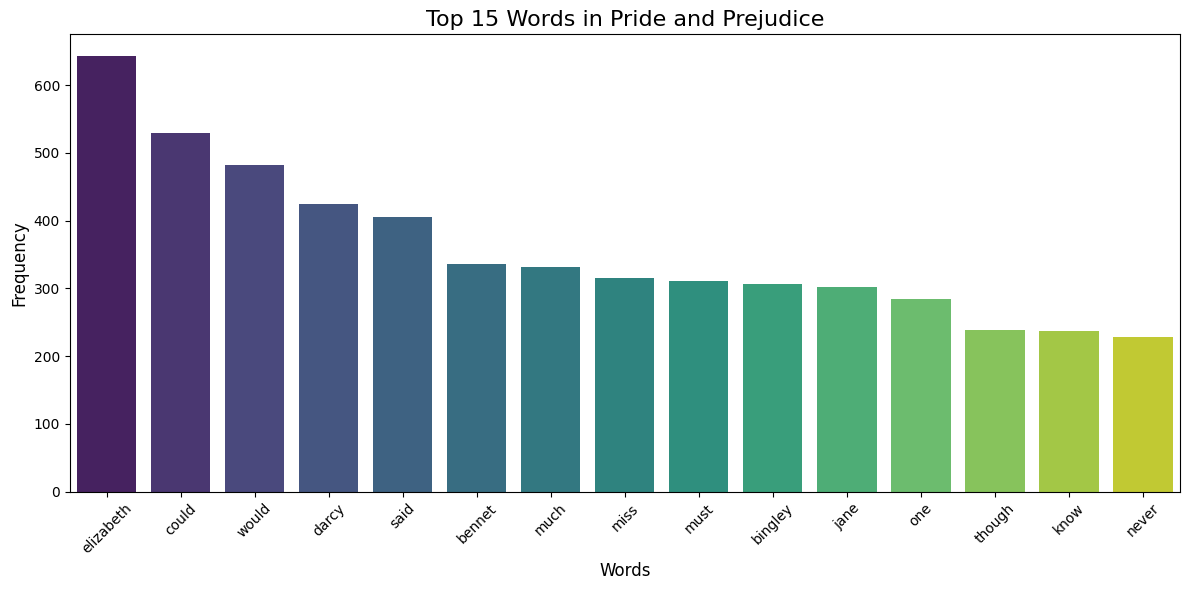

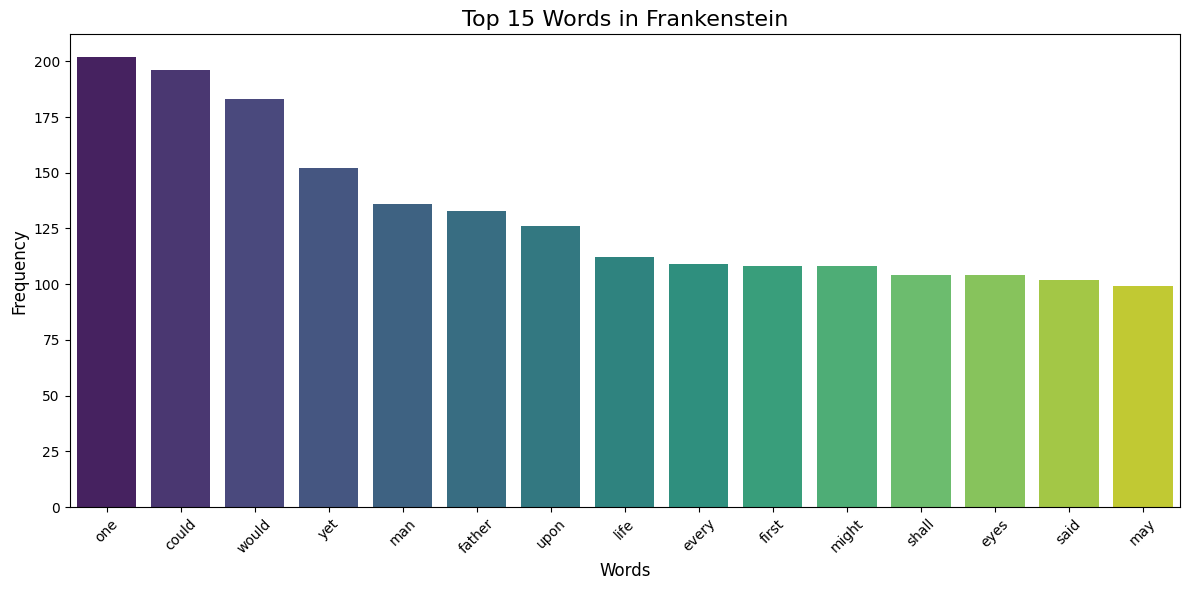


Task A.ii: Calculating average chapter length...
Found 75 chapters in Pride and Prejudice
Chapter lengths range from 4 to 28662 words
Found 25 chapters in Frankenstein
Chapter lengths range from 1764 to 8246 words

Average chapter length in Pride and Prejudice: 1638.59 words
Average chapter length in Frankenstein: 2997.44 words

Task A.iii: Finding frequent phrases and named entities...

=== N-GRAMS ANALYSIS ===

--- BIGRAMS (2-word phrases) ---
Pride and Prejudice - Top 10 Bigrams:
 1. 'lady catherine' (122 times)
 2. 'miss bingley' (87 times)
 3. 'miss bennet' (67 times)
 4. 'said elizabeth' (46 times)
 5. 'sir william' (44 times)
 6. 'miss darcy' (39 times)
 7. 'young man' (37 times)
 8. 'colonel fitzwilliam' (30 times)
 9. 'dare say' (28 times)
10. 'young ladies' (28 times)

Frankenstein - Top 10 Bigrams:
 1. 'old man' (34 times)
 2. 'chapter chapter' (23 times)
 3. 'native country' (15 times)
 4. 'natural philosophy' (14 times)
 5. 'taken place' (13 times)
 6. 'looked upon' (10 t

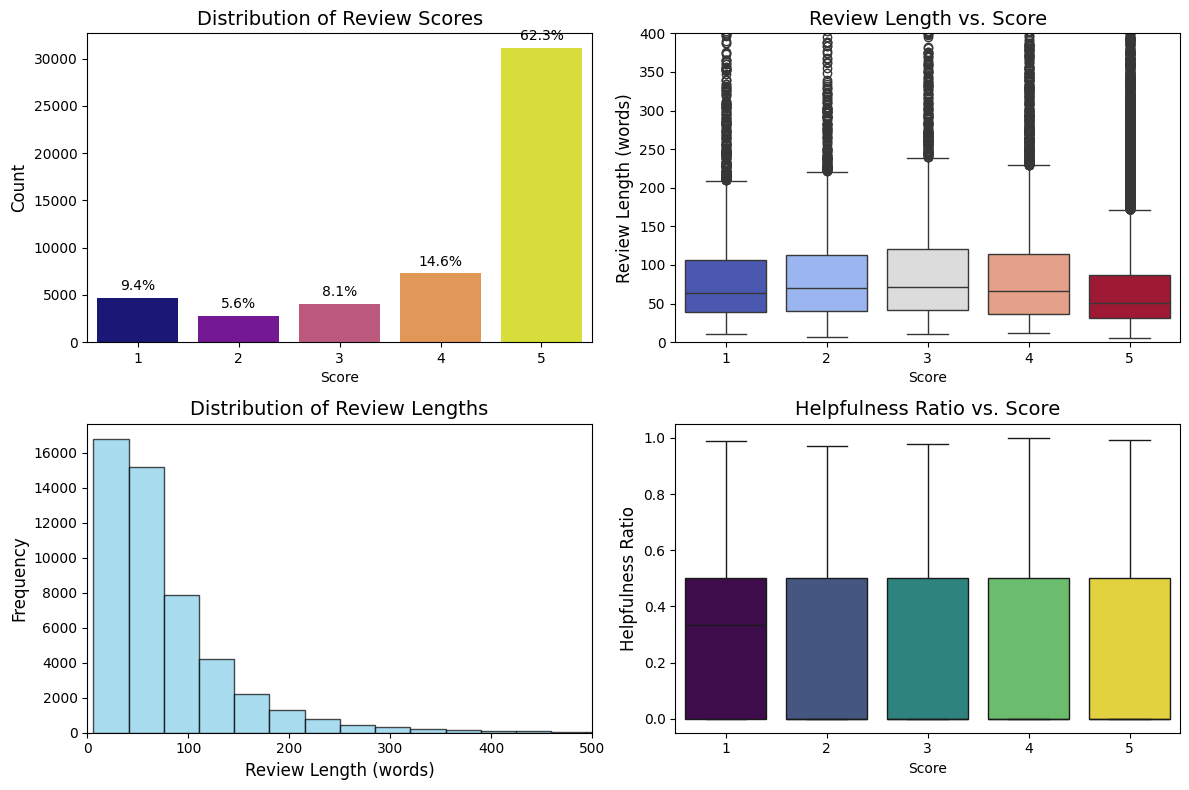


=== DETAILED STATISTICS ===
Average review length: 79.38 words
Median review length: 57.00 words
Most helpful review has 398 helpful votes

=== SCORE-BASED ANALYSIS ===
      ReviewLength               HelpfulnessRatio        HelpfulnessNumerator
              mean median    std             mean median                 mean
Score                                                                        
1            86.66   64.0  83.56             0.31   0.33                 2.56
2            91.25   70.0  77.27             0.25   0.00                 1.58
3            94.70   72.0  79.68             0.24   0.00                 1.65
4            91.10   66.0  83.86             0.25   0.00                 1.35
5            72.47   51.0  70.27             0.27   0.00                 1.51

Cleaning review text... (This may take a moment)
Text cleaning complete.

=== SENTIMENT-BASED WORD ANALYSIS ===
Positive reviews (Score 4-5): 38418
Negative reviews (Score 1-2): 7535
Neutral reviews (Score

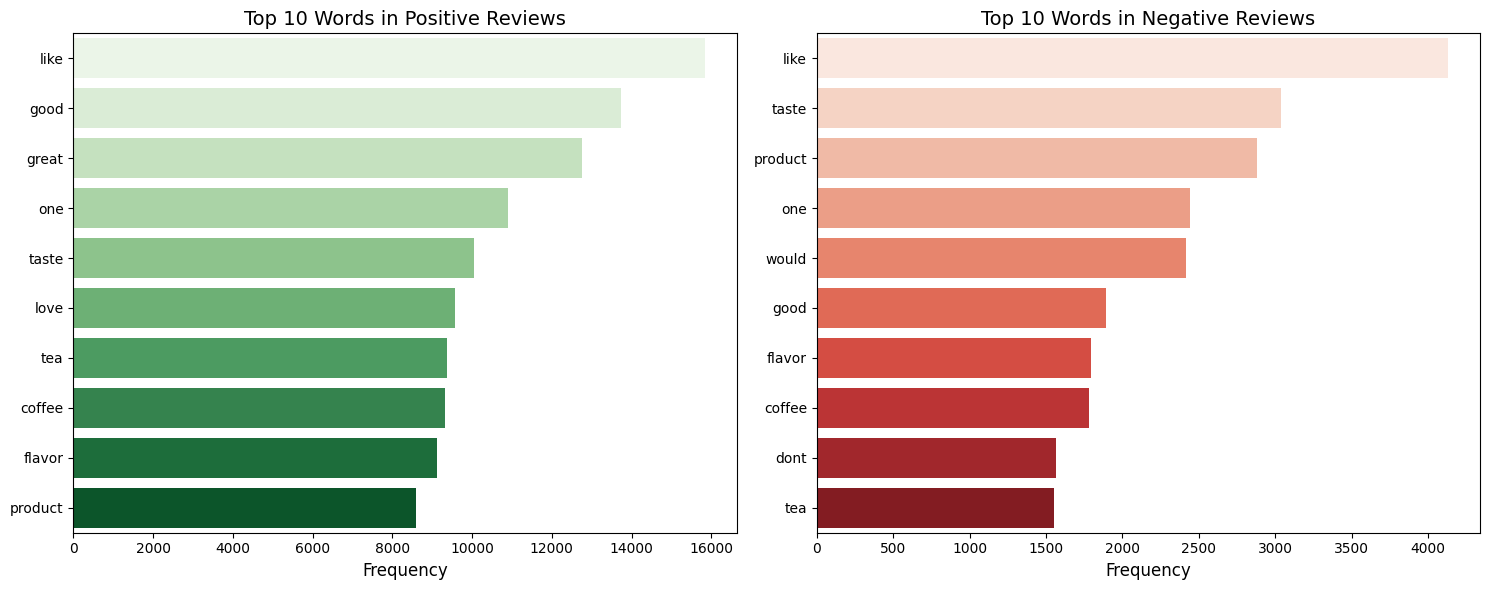


Generating word clouds for visual analysis...


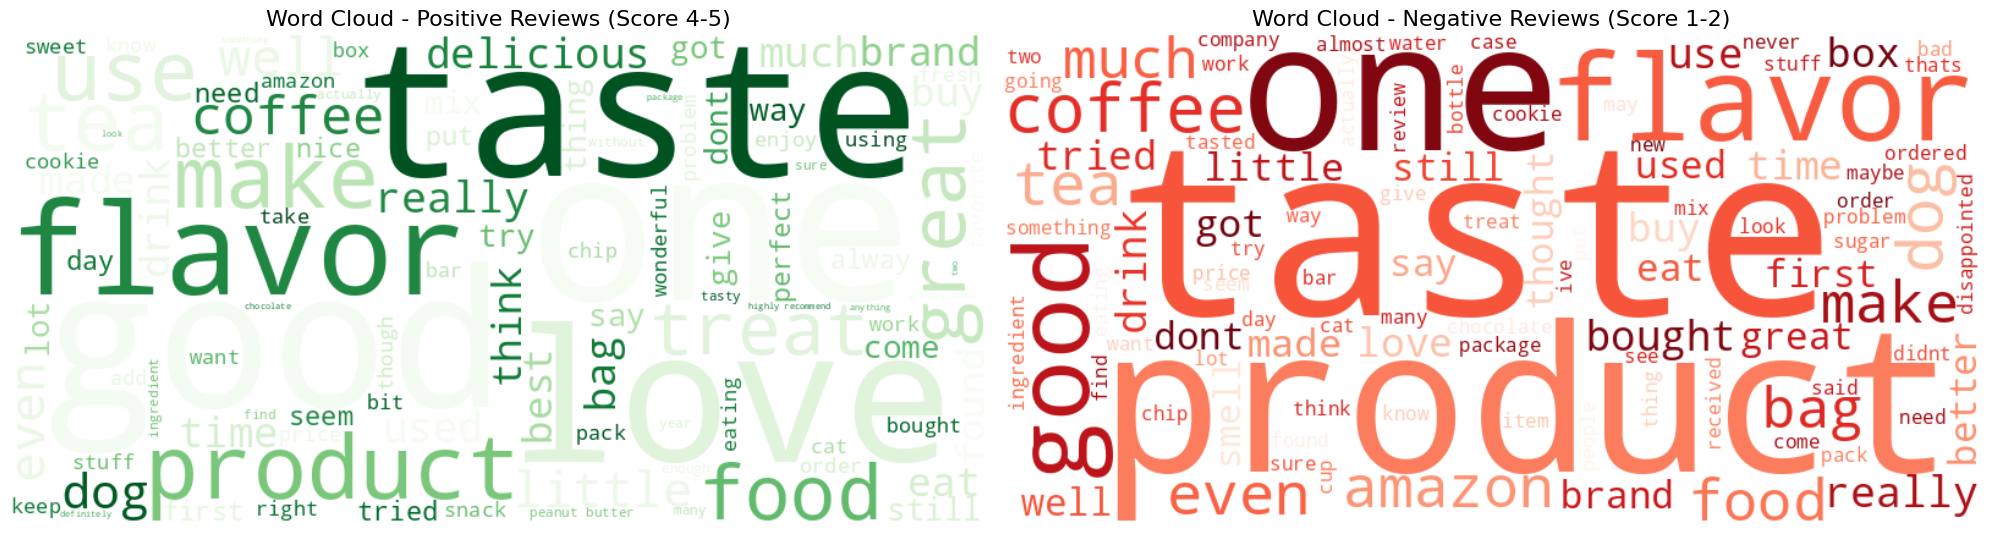


SUMMARY OF FINDINGS:
1. Dataset is heavily skewed towards positive reviews (5-star reviews dominate)
2. Review length varies by sentiment - extreme scores tend to have longer reviews
3. Positive reviews focus on quality, taste, and satisfaction
4. Negative reviews emphasize problems, disappointment, and specific issues
5. The analysis provides a foundation for building sentiment prediction models

--- Analysis Complete ---


In [6]:
# =============================================================================
#               NLP and EDA on Novels and Review Datasets
# =============================================================================
# Part A: Analysis of two novels ("Pride and Prejudice" and "Frankenstein").
# Part B: Exploratory Data Analysis (EDA) on the Amazon Fine Food Reviews dataset.
# =============================================================================

# -----------------------------------------------------------------------------
# STEP 1: INITIAL SETUP (Import Libraries and Download Data)
# -----------------------------------------------------------------------------

import requests
import nltk
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import numpy as np

# Download required NLTK data models
print("Downloading NLTK models...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('maxent_ne_chunker', quiet=True)
nltk.download('words', quiet=True)
print("Downloads complete.")

# =============================================================================
# PART A: ANALYSIS OF TWO NOVELS
# =============================================================================

print("\n--- Starting Part A: Novel Analysis ---")

def get_book_text(url):
    """Fetches and cleans the text of a book from Project Gutenberg."""
    try:
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        text = response.text
        # Use regex to strip the header and footer added by Project Gutenberg
        match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK .*?\*\*\*(.*)\*\*\* END OF THIS PROJECT GUTENBERG EBOOK', text, re.S)
        if match:
            text = match.group(1)
        return text
    except requests.RequestException as e:
        print(f"Error fetching book: {e}")
        return None

# URLs for the classic novels
url_pride = "https://www.gutenberg.org/files/1342/1342-0.txt"
url_frankenstein = "https://www.gutenberg.org/files/84/84-0.txt"

# Fetch the text for both books
pride_text = get_book_text(url_pride)
frankenstein_text = get_book_text(url_frankenstein)

if pride_text and frankenstein_text:
    print(f"Loaded 'Pride and Prejudice' with {len(pride_text.split())} words.")
    print(f"Loaded 'Frankenstein' with {len(frankenstein_text.split())} words.")
else:
    print("Error loading books. Please check your internet connection.")
    exit()

# Define the set of English stop words
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    """Tokenizes text, converts to lowercase, and removes stop words and punctuation."""
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    clean_tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]
    return clean_tokens

# Process both novels to get clean tokens
pride_tokens = preprocess_text(pride_text)
frankenstein_tokens = preprocess_text(frankenstein_text)

# --- Task A.i: Obtain Most Frequent Words Distribution ---
print("\nTask A.i: Generating most frequent word distributions...")
pride_freq = Counter(pride_tokens)
frankenstein_freq = Counter(frankenstein_tokens)

def plot_word_frequency(common_words, title):
    """Helper function to create a bar plot of word frequencies."""
    words, counts = zip(*common_words)
    plt.figure(figsize=(12, 6))
    # Fix for seaborn warning
    sns.barplot(x=list(words), y=list(counts), hue=list(words), palette='viridis', legend=False)
    plt.title(title, fontsize=16)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_word_frequency(pride_freq.most_common(15), 'Top 15 Words in Pride and Prejudice')
plot_word_frequency(frankenstein_freq.most_common(15), 'Top 15 Words in Frankenstein')

# --- Task A.ii: Calculate Average Chapter Length ---
print("\nTask A.ii: Calculating average chapter length...")

def get_avg_chapter_length(full_text, book_name):
    """Calculates the average word count per chapter using multiple regex patterns."""
    # Try multiple chapter patterns
    patterns = [
        r'Chapter \d+',
        r'CHAPTER \d+',
        r'Chapter [IVX]+',
        r'CHAPTER [IVX]+',
        r'Letter \d+',  # For Frankenstein's letter format
        r'LETTER \d+'
    ]

    chapters = []
    for pattern in patterns:
        chapters = re.split(pattern, full_text, flags=re.IGNORECASE)
        if len(chapters) > 1:  # Found valid chapter divisions
            break

    if len(chapters) <= 1:
        print(f"Warning: No clear chapter divisions found in {book_name}")
        return 0

    # The first element is usually the book's preamble, so we skip it
    chapter_lengths = [len(chapter.split()) for chapter in chapters[1:] if chapter.strip()]

    print(f"Found {len(chapter_lengths)} chapters in {book_name}")
    if chapter_lengths:
        avg_length = sum(chapter_lengths) / len(chapter_lengths)
        print(f"Chapter lengths range from {min(chapter_lengths)} to {max(chapter_lengths)} words")
        return avg_length
    return 0

avg_len_pride = get_avg_chapter_length(pride_text, "Pride and Prejudice")
avg_len_frankenstein = get_avg_chapter_length(frankenstein_text, "Frankenstein")

print(f"\nAverage chapter length in Pride and Prejudice: {avg_len_pride:.2f} words")
print(f"Average chapter length in Frankenstein: {avg_len_frankenstein:.2f} words")

# --- Task A.iii: Find Most Frequent Phrases, Characters, and Places ---
print("\nTask A.iii: Finding frequent phrases and named entities...")
from nltk.util import ngrams

def get_top_ngrams(tokens, n, top_k=10):
    """Finds the most common n-grams in a list of tokens."""
    n_grams = ngrams(tokens, n)
    return Counter(n_grams).most_common(top_k)

# N-grams analysis (Bigrams, Trigrams, Quadgrams as requested)
print("\n=== N-GRAMS ANALYSIS ===")
print("\n--- BIGRAMS (2-word phrases) ---")
pride_bigrams = get_top_ngrams(pride_tokens, 2)
frank_bigrams = get_top_ngrams(frankenstein_tokens, 2)
print("Pride and Prejudice - Top 10 Bigrams:")
for i, (gram, count) in enumerate(pride_bigrams, 1):
    print(f"{i:2d}. '{' '.join(gram)}' ({count} times)")

print("\nFrankenstein - Top 10 Bigrams:")
for i, (gram, count) in enumerate(frank_bigrams, 1):
    print(f"{i:2d}. '{' '.join(gram)}' ({count} times)")

print("\n--- TRIGRAMS (3-word phrases) ---")
pride_trigrams = get_top_ngrams(pride_tokens, 3)
frank_trigrams = get_top_ngrams(frankenstein_tokens, 3)
print("Pride and Prejudice - Top 10 Trigrams:")
for i, (gram, count) in enumerate(pride_trigrams, 1):
    print(f"{i:2d}. '{' '.join(gram)}' ({count} times)")

print("\nFrankenstein - Top 10 Trigrams:")
for i, (gram, count) in enumerate(frank_trigrams, 1):
    print(f"{i:2d}. '{' '.join(gram)}' ({count} times)")

print("\n--- QUADGRAMS (4-word phrases) ---")
pride_quadgrams = get_top_ngrams(pride_tokens, 4)
frank_quadgrams = get_top_ngrams(frankenstein_tokens, 4)
print("Pride and Prejudice - Top 10 Quadgrams:")
for i, (gram, count) in enumerate(pride_quadgrams, 1):
    print(f"{i:2d}. '{' '.join(gram)}' ({count} times)")

print("\nFrankenstein - Top 10 Quadgrams:")
for i, (gram, count) in enumerate(frank_quadgrams, 1):
    print(f"{i:2d}. '{' '.join(gram)}' ({count} times)")

def extract_named_entities(text, book_name):
    """Extracts characters (PERSON) and places (GPE) from text using NER."""
    print(f"\nExtracting named entities from {book_name}...")
    # Use a larger sample for better entity extraction
    sample_text = text[:50000]  # Increased sample size

    sentences = nltk.sent_tokenize(sample_text)
    characters = Counter()
    places = Counter()

    for sentence in sentences[:100]:  # Process first 100 sentences
        tokens = nltk.word_tokenize(sentence)
        tagged_tokens = nltk.pos_tag(tokens)

        try:
            chunked_tokens = nltk.ne_chunk(tagged_tokens)

            for chunk in chunked_tokens:
                if hasattr(chunk, 'label'):
                    entity_name = ' '.join(c[0] for c in chunk)
                    # Filter out common false positives
                    if len(entity_name) > 1 and entity_name.isalpha():
                        if chunk.label() == 'PERSON':
                            characters[entity_name] += 1
                        elif chunk.label() == 'GPE':  # Geopolitical Entity (places)
                            places[entity_name] += 1
        except Exception as e:
            continue

    return characters.most_common(10), places.most_common(10)

# Extract named entities
print("\n=== NAMED ENTITY RECOGNITION ===")
pride_chars, pride_places = extract_named_entities(pride_text, "Pride and Prejudice")
frank_chars, frank_places = extract_named_entities(frankenstein_text, "Frankenstein")

print("\n--- Pride and Prejudice ---")
print("Top Characters:", [f"{name} ({count})" for name, count in pride_chars])
print("Top Places:", [f"{name} ({count})" for name, count in pride_places])

print("\n--- Frankenstein ---")
print("Top Characters:", [f"{name} ({count})" for name, count in frank_chars])
print("Top Places:", [f"{name} ({count})" for name, count in frank_places])

# =============================================================================
# PART B: EDA ON A REAL-WORLD REVIEW DATASET
# =============================================================================

print("\n\n" + "="*70)
print("--- Starting Part B: EDA on Amazon Reviews Dataset ---")
print("="*70)

try:
    file_name = 'Reviews.csv'
    df = pd.read_csv(file_name, nrows=50000)
    print(f"\nSuccessfully loaded {len(df)} rows from '{file_name}'.")

    # --- Task B.ii: Understand the Dataset ---
    print("\n" + "="*50)
    print("Task B.ii: Understanding the dataset...")
    print("="*50)

    print("\n1. Dataset Shape:", df.shape)
    print("\n2. Dataset Info:")
    df.info()

    print("\n3. First few rows:")
    print(df.head())

    print("\n4. Basic Statistics:")
    print(df.describe())

    print("\n5. Missing Values:")
    print(df.isnull().sum())

    print("\n6. Distribution of Scores:")
    score_dist = df['Score'].value_counts().sort_index()
    print(score_dist)

    # Problem Statement Formulation
    print("\n" + "="*50)
    print("PROBLEM STATEMENT:")
    print("="*50)
    print("Objective: Analyze Amazon Fine Food Reviews to understand:")
    print("1. Distribution of review scores and their characteristics")
    print("2. Relationship between review length and satisfaction")
    print("3. Key themes and sentiments in positive vs negative reviews")
    print("4. Identify patterns that could help predict review sentiment")

    # --- Task B.iii: Perform EDA on the Dataset ---
    print("\n" + "="*50)
    print("Task B.iii: Performing Exploratory Data Analysis...")
    print("="*50)

    # 1. Score Distribution Analysis
    plt.figure(figsize=(12, 8))

    # Subplot 1: Score Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(x='Score', data=df, hue='Score', palette='plasma', legend=False)
    plt.title('Distribution of Review Scores', fontsize=14)
    plt.ylabel('Count', fontsize=12)

    # Add percentage labels on bars
    total = len(df)
    for i, v in enumerate(df['Score'].value_counts().sort_index().values):
        plt.text(i, v + total*0.01, f'{v/total*100:.1f}%', ha='center', va='bottom')

    # 2. Review Length Analysis
    df['ReviewLength'] = df['Text'].astype(str).apply(lambda x: len(x.split()))

    plt.subplot(2, 2, 2)
    sns.boxplot(x='Score', y='ReviewLength', data=df, hue='Score', palette='coolwarm', legend=False)
    plt.title('Review Length vs. Score', fontsize=14)
    plt.ylabel('Review Length (words)', fontsize=12)
    plt.ylim(0, 400)

    # 3. Review Length Distribution
    plt.subplot(2, 2, 3)
    plt.hist(df['ReviewLength'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Review Lengths', fontsize=14)
    plt.xlabel('Review Length (words)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlim(0, 500)

    # 4. Score vs Helpfulness
    plt.subplot(2, 2, 4)
    df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / (df['HelpfulnessDenominator'] + 1)
    sns.boxplot(x='Score', y='HelpfulnessRatio', data=df, hue='Score', palette='viridis', legend=False)
    plt.title('Helpfulness Ratio vs. Score', fontsize=14)
    plt.ylabel('Helpfulness Ratio', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Additional Analysis
    print("\n=== DETAILED STATISTICS ===")
    print(f"Average review length: {df['ReviewLength'].mean():.2f} words")
    print(f"Median review length: {df['ReviewLength'].median():.2f} words")
    print(f"Most helpful review has {df['HelpfulnessNumerator'].max()} helpful votes")

    # Score-based statistics
    print("\n=== SCORE-BASED ANALYSIS ===")
    score_stats = df.groupby('Score').agg({
        'ReviewLength': ['mean', 'median', 'std'],
        'HelpfulnessRatio': ['mean', 'median'],
        'HelpfulnessNumerator': 'mean'
    }).round(2)
    print(score_stats)

    # Text preprocessing for sentiment analysis
    def clean_review_text(text):
        """Enhanced text cleaning function."""
        text = str(text).lower()
        text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace

        tokens = nltk.word_tokenize(text)
        clean_tokens = [word for word in tokens if word.isalpha()
                       and word not in stop_words and len(word) > 2]
        return ' '.join(clean_tokens)

    print("\nCleaning review text... (This may take a moment)")
    df['CleanedText'] = df['Text'].apply(clean_review_text)
    print("Text cleaning complete.")

    # Sentiment-based word analysis
    print("\n=== SENTIMENT-BASED WORD ANALYSIS ===")

    # Categorize reviews
    positive_reviews = df[df['Score'] >= 4]['CleanedText']
    negative_reviews = df[df['Score'] <= 2]['CleanedText']
    neutral_reviews = df[df['Score'] == 3]['CleanedText']

    print(f"Positive reviews (Score 4-5): {len(positive_reviews)}")
    print(f"Negative reviews (Score 1-2): {len(negative_reviews)}")
    print(f"Neutral reviews (Score 3): {len(neutral_reviews)}")

    # Most common words in positive and negative reviews
    def get_top_words(text_series, top_n=20):
        all_text = ' '.join(text_series.fillna(''))
        words = all_text.split()
        return Counter(words).most_common(top_n)

    print("\nTop 15 words in POSITIVE reviews:")
    pos_words = get_top_words(positive_reviews, 15)
    for i, (word, count) in enumerate(pos_words, 1):
        print(f"{i:2d}. {word} ({count})")

    print("\nTop 15 words in NEGATIVE reviews:")
    neg_words = get_top_words(negative_reviews, 15)
    for i, (word, count) in enumerate(neg_words, 1):
        print(f"{i:2d}. {word} ({count})")

    # Create comparison visualization
    plt.figure(figsize=(15, 6))

    # Positive words
    plt.subplot(1, 2, 1)
    pos_w, pos_c = zip(*pos_words[:10])
    sns.barplot(x=list(pos_c), y=list(pos_w), hue=list(pos_w), palette='Greens', legend=False)
    plt.title('Top 10 Words in Positive Reviews', fontsize=14)
    plt.xlabel('Frequency', fontsize=12)

    # Negative words
    plt.subplot(1, 2, 2)
    neg_w, neg_c = zip(*neg_words[:10])
    sns.barplot(x=list(neg_c), y=list(neg_w), hue=list(neg_w), palette='Reds', legend=False)
    plt.title('Top 10 Words in Negative Reviews', fontsize=14)
    plt.xlabel('Frequency', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Optional: Word Clouds (you mentioned they might be unnecessary, but they're good for visualization)
    print("\nGenerating word clouds for visual analysis...")

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Positive reviews word cloud
    positive_text = ' '.join(positive_reviews.fillna(''))
    if positive_text.strip():
        wc_positive = WordCloud(width=800, height=400,
                               background_color='white',
                               colormap='Greens',
                               max_words=100).generate(positive_text)
        axes[0].imshow(wc_positive, interpolation='bilinear')
        axes[0].set_title('Word Cloud - Positive Reviews (Score 4-5)', fontsize=16)
        axes[0].axis('off')

    # Negative reviews word cloud
    negative_text = ' '.join(negative_reviews.fillna(''))
    if negative_text.strip():
        wc_negative = WordCloud(width=800, height=400,
                               background_color='white',
                               colormap='Reds',
                               max_words=100).generate(negative_text)
        axes[1].imshow(wc_negative, interpolation='bilinear')
        axes[1].set_title('Word Cloud - Negative Reviews (Score 1-2)', fontsize=16)
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    print("\n" + "="*50)
    print("SUMMARY OF FINDINGS:")
    print("="*50)
    print("1. Dataset is heavily skewed towards positive reviews (5-star reviews dominate)")
    print("2. Review length varies by sentiment - extreme scores tend to have longer reviews")
    print("3. Positive reviews focus on quality, taste, and satisfaction")
    print("4. Negative reviews emphasize problems, disappointment, and specific issues")
    print("5. The analysis provides a foundation for building sentiment prediction models")

except FileNotFoundError:
    print(f"\nError: 'Reviews.csv' not found in current directory.")
    print("Please ensure you have uploaded the Amazon Fine Food Reviews dataset.")
    print("You can download it from: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

print("\n" + "="*70)
print("--- Analysis Complete ---")
print("="*70)